<a href="https://colab.research.google.com/github/palberth/Modelos_y_Metodos_de_Sistemas_Inteligentes/blob/main/Sistema_Control_Difuso_Iluminacion_Temperatura_Horno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso de Estudio: Control Difuso para la Regulación de la Temperatura de un Horno

## Descripción del Problema:

Deseamos controlar la temperatura de un horno industrial para mantenerla lo más cercana posible a un punto de ajuste deseado. Un control ON/OFF simple puede generar oscilaciones significativas y un desgaste prematuro del elemento calefactor. Un control PID podría ser una opción, pero para este caso de estudio, exploraremos la aplicación de un sistema de control difuso (Fuzzy Logic Control - FLC) para un control más suave e intuitivo, especialmente cuando las relaciones exactas entre las variables de entrada y salida no son fácilmente modelables matemáticamente de forma precisa.

## Variables del Sistema:

1.  **Entradas (Antecedentes):**
    * **Error de Temperatura (Error):** La diferencia entre la temperatura deseada (setpoint) y la temperatura actual del horno.
        * Universo de Discurso: `[-10, 10]` grados Celsius (ej. -10°C si la temperatura actual es 10°C por encima del setpoint, 10°C si está 10°C por debajo).
        * Conjuntos Difusos: `Negativo Grande (NG)`, `Negativo Pequeño (NP)`, `Cero (C)`, `Positivo Pequeño (PP)`, `Positivo Grande (PG)`.
    * **Cambio en el Error de Temperatura (Delta_Error):** La tasa de cambio del error de temperatura a lo largo del tiempo. Indica si el error está aumentando o disminuyendo.
        * Universo de Discurso: `[-5, 5]` grados Celsius/segundo (ej. -5°C/s si el error disminuye rápidamente, 5°C/s si aumenta rápidamente).
        * Conjuntos Difusos: `Decreciendo Rápido (DR)`, `Decreciendo Lento (DL)`, `Estable (E)`, `Creciendo Lento (CL)`, `Creciendo Rápido (CR)`.

2.  **Salida (Consecuente):**
    * **Potencia del Calentador (Potencia_Calentador):** El porcentaje de potencia que debe aplicar el elemento calefactor.
        * Universo de Discurso: `[0, 100]` por ciento.
        * Conjuntos Difusos: `Apagado (OFF)`, `Muy Baja (MB)`, `Baja (B)`, `Media (M)`, `Alta (A)`, `Muy Alta (MA)`.

## Reglas Difusas (Base de Conocimiento):

Las reglas difusas se establecen en lenguaje natural, capturando la experiencia de un operador humano o un experto en el proceso. Aquí hay algunas reglas de ejemplo:

* SI Error es `NG` Y Delta_Error es `DR` ENTONCES Potencia_Calentador es `Apagado`.
* SI Error es `NG` Y Delta_Error es `E` ENTONCES Potencia_Calentador es `Muy Baja`.
* SI Error es `NP` Y Delta_Error es `DL` ENTONCES Potencia_Calentador es `Baja`.
* SI Error es `C` Y Delta_Error es `E` ENTONCES Potencia_Calentador es `Media`.
* SI Error es `PP` Y Delta_Error es `CL` ENTONCES Potencia_Calentador es `Alta`.
* SI Error es `PG` Y Delta_Error es `CR` ENTONCES Potencia_Calentador es `Muy Alta`.
* SI Error es `PG` Y Delta_Error es `E` ENTONCES Potencia_Calentador es `Muy Alta`.

## Objetivo de la Simulación:

Visualizar cómo el sistema de control difuso (FLC) responde a diferentes combinaciones de `Error` y `Delta_Error`, y cómo se determina la `Potencia_Calentador` de salida. Se demostrarán las funciones de pertenencia y la superficie de control.

---

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.1 MB/s eta 0:00:00
Funciones de Pertenencia para 'Error':


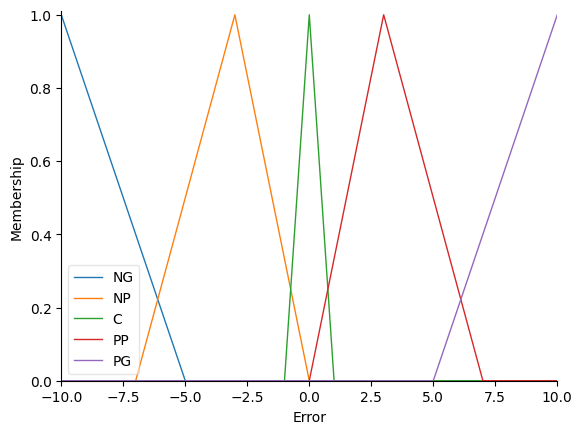


Funciones de Pertenencia para 'Delta_Error':


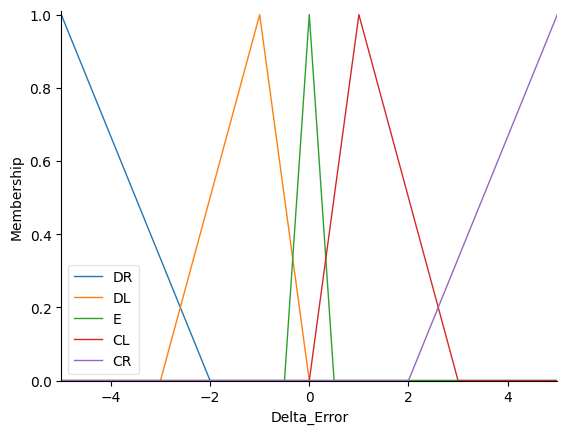


Funciones de Pertenencia para 'Potencia_Calentador':


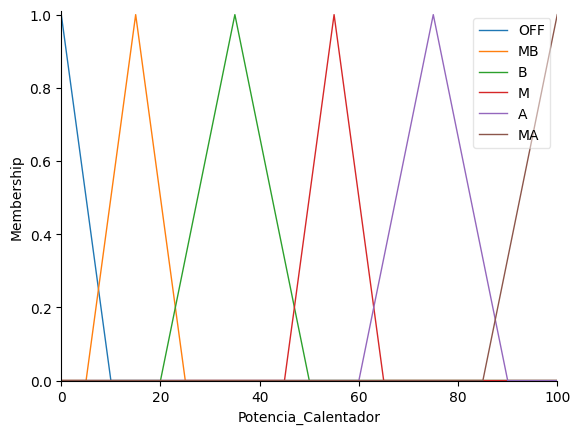


--- Simulación Caso 1 ---
Potencia del calentador (Caso 1): 93.67%


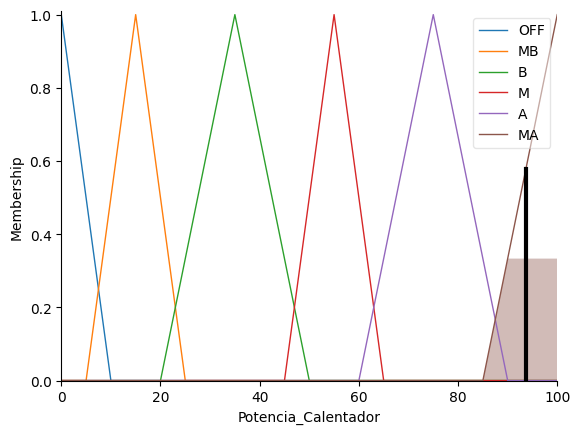


--- Simulación Caso 2 ---
Potencia del calentador (Caso 2): 35.00%


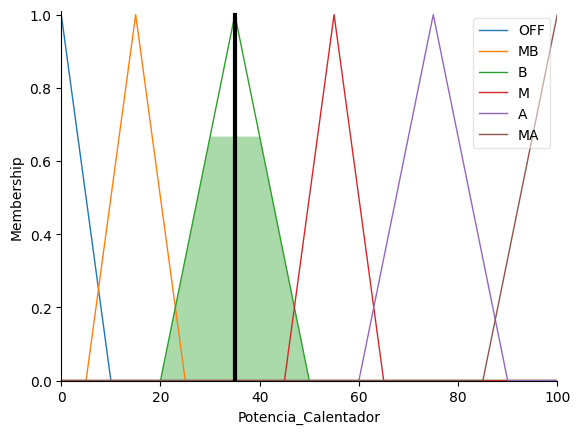


--- Simulación Caso 3 ---
Potencia del calentador (Caso 3): 65.30%


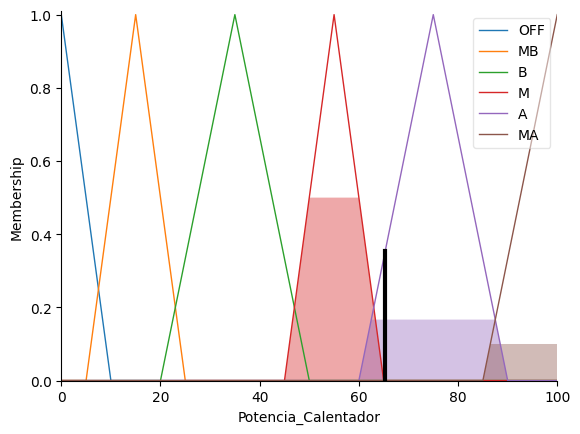


Generando superficie de control 3D (puede tardar unos segundos)...


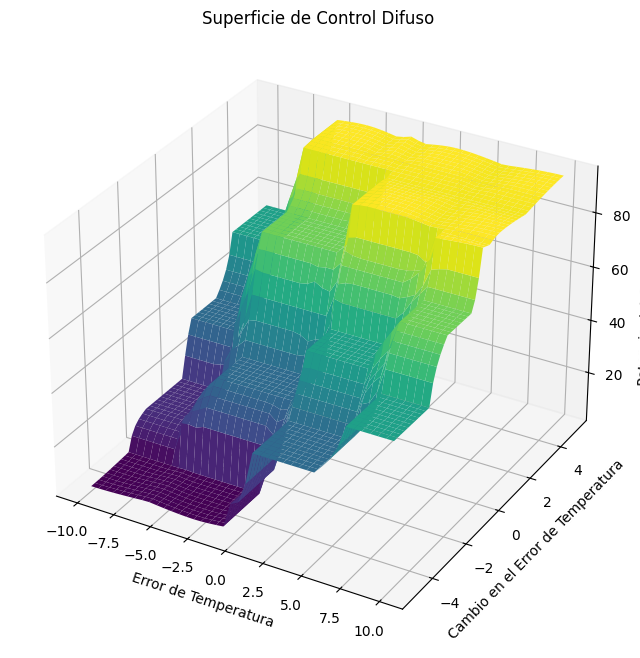

Superficie de control 3D generada.


In [1]:
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 1. Definición de las variables de entrada y salida (antecedentes y consecuentes)

# Antecedente: Error de Temperatura
error = ctrl.Antecedent(np.arange(-10, 10.1, 0.1), 'Error')
# Antecedente: Cambio en el Error de Temperatura
delta_error = ctrl.Antecedent(np.arange(-5, 5.1, 0.1), 'Delta_Error')
# Consecuente: Potencia del Calentador
potencia_calentador = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'Potencia_Calentador')

# 2. Definición de las funciones de pertenencia para cada variable

# Funciones de pertenencia para 'Error'
error['NG'] = fuzz.trimf(error.universe, [-10, -10, -5]) # Negativo Grande
error['NP'] = fuzz.trimf(error.universe, [-7, -3, 0])   # Negativo Pequeño
error['C'] = fuzz.trimf(error.universe, [-1, 0, 1])     # Cero
error['PP'] = fuzz.trimf(error.universe, [0, 3, 7])     # Positivo Pequeño
error['PG'] = fuzz.trimf(error.universe, [5, 10, 10])   # Positivo Grande

# Funciones de pertenencia para 'Delta_Error'
delta_error['DR'] = fuzz.trimf(delta_error.universe, [-5, -5, -2]) # Decreciendo Rápido
delta_error['DL'] = fuzz.trimf(delta_error.universe, [-3, -1, 0]) # Decreciendo Lento
delta_error['E'] = fuzz.trimf(delta_error.universe, [-0.5, 0, 0.5]) # Estable
delta_error['CL'] = fuzz.trimf(delta_error.universe, [0, 1, 3])   # Creciendo Lento
delta_error['CR'] = fuzz.trimf(delta_error.universe, [2, 5, 5])   # Creciendo Rápido

# Funciones de pertenencia para 'Potencia_Calentador'
potencia_calentador['OFF'] = fuzz.trimf(potencia_calentador.universe, [0, 0, 10])    # Apagado
potencia_calentador['MB'] = fuzz.trimf(potencia_calentador.universe, [5, 15, 25])   # Muy Baja
potencia_calentador['B'] = fuzz.trimf(potencia_calentador.universe, [20, 35, 50])   # Baja
potencia_calentador['M'] = fuzz.trimf(potencia_calentador.universe, [45, 55, 65])   # Media
potencia_calentador['A'] = fuzz.trimf(potencia_calentador.universe, [60, 75, 90])   # Alta
potencia_calentador['MA'] = fuzz.trimf(potencia_calentador.universe, [85, 100, 100]) # Muy Alta

# Visualización de las funciones de pertenencia (Opcional, pero muy útil)
print("Funciones de Pertenencia para 'Error':")
error.view()
plt.show()

print("\nFunciones de Pertenencia para 'Delta_Error':")
delta_error.view()
plt.show()

print("\nFunciones de Pertenencia para 'Potencia_Calentador':")
potencia_calentador.view()
plt.show()

# 3. Definición de las reglas difusas

rule1 = ctrl.Rule(error['NG'] & delta_error['DR'], potencia_calentador['OFF'])
rule2 = ctrl.Rule(error['NG'] & delta_error['DL'], potencia_calentador['MB'])
rule3 = ctrl.Rule(error['NG'] & delta_error['E'], potencia_calentador['MB'])
rule4 = ctrl.Rule(error['NG'] & delta_error['CL'], potencia_calentador['B'])
rule5 = ctrl.Rule(error['NG'] & delta_error['CR'], potencia_calentador['M'])

rule6 = ctrl.Rule(error['NP'] & delta_error['DR'], potencia_calentador['OFF'])
rule7 = ctrl.Rule(error['NP'] & delta_error['DL'], potencia_calentador['B'])
rule8 = ctrl.Rule(error['NP'] & delta_error['E'], potencia_calentador['M'])
rule9 = ctrl.Rule(error['NP'] & delta_error['CL'], potencia_calentador['A'])
rule10 = ctrl.Rule(error['NP'] & delta_error['CR'], potencia_calentador['MA'])

rule11 = ctrl.Rule(error['C'] & delta_error['DR'], potencia_calentador['MB'])
rule12 = ctrl.Rule(error['C'] & delta_error['DL'], potencia_calentador['B'])
rule13 = ctrl.Rule(error['C'] & delta_error['E'], potencia_calentador['M']) # Regla central
rule14 = ctrl.Rule(error['C'] & delta_error['CL'], potencia_calentador['A'])
rule15 = ctrl.Rule(error['C'] & delta_error['CR'], potencia_calentador['MA'])

rule16 = ctrl.Rule(error['PP'] & delta_error['DR'], potencia_calentador['B'])
rule17 = ctrl.Rule(error['PP'] & delta_error['DL'], potencia_calentador['M'])
rule18 = ctrl.Rule(error['PP'] & delta_error['E'], potencia_calentador['A'])
rule19 = ctrl.Rule(error['PP'] & delta_error['CL'], potencia_calentador['MA'])
rule20 = ctrl.Rule(error['PP'] & delta_error['CR'], potencia_calentador['MA'])

rule21 = ctrl.Rule(error['PG'] & delta_error['DR'], potencia_calentador['M'])
rule22 = ctrl.Rule(error['PG'] & delta_error['DL'], potencia_calentador['A'])
rule23 = ctrl.Rule(error['PG'] & delta_error['E'], potencia_calentador['MA'])
rule24 = ctrl.Rule(error['PG'] & delta_error['CL'], potencia_calentador['MA'])
rule25 = ctrl.Rule(error['PG'] & delta_error['CR'], potencia_calentador['MA'])

# 4. Creación del sistema de control difuso

sistema_control = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5,
    rule6, rule7, rule8, rule9, rule10,
    rule11, rule12, rule13, rule14, rule15,
    rule16, rule17, rule18, rule19, rule20,
    rule21, rule22, rule23, rule24, rule25
])

# 5. Simulación del sistema de control

horno_simulador = ctrl.ControlSystemSimulation(sistema_control)

# Ejemplo de uso:
# Caso 1: Temperatura muy por debajo del setpoint, y el error está aumentando (empeorando)
print("\n--- Simulación Caso 1 ---")
horno_simulador.input['Error'] = 8  # Temperatura 8°C por debajo del setpoint
horno_simulador.input['Delta_Error'] = 3 # Error aumentando (la temperatura sigue bajando)
horno_simulador.compute()
print(f"Potencia del calentador (Caso 1): {horno_simulador.output['Potencia_Calentador']:.2f}%")
potencia_calentador.view(sim=horno_simulador)
plt.show()

# Caso 2: Temperatura ligeramente por encima del setpoint, y el error está disminuyendo (mejorando)
print("\n--- Simulación Caso 2 ---")
horno_simulador.input['Error'] = -2 # Temperatura 2°C por encima del setpoint
horno_simulador.input['Delta_Error'] = -1.5 # Error disminuyendo (la temperatura está volviendo al setpoint)
horno_simulador.compute()
print(f"Potencia del calentador (Caso 2): {horno_simulador.output['Potencia_Calentador']:.2f}%")
potencia_calentador.view(sim=horno_simulador)
plt.show()

# Caso 3: Temperatura cerca del setpoint, y el error es estable
print("\n--- Simulación Caso 3 ---")
horno_simulador.input['Error'] = 0.5 # Ligeramente por debajo del setpoint
horno_simulador.input['Delta_Error'] = 0.1 # Error estable
horno_simulador.compute()
print(f"Potencia del calentador (Caso 3): {horno_simulador.output['Potencia_Calentador']:.2f}%")
potencia_calentador.view(sim=horno_simulador)
plt.show()

# 6. Visualización de la superficie de control (3D)

# Esto puede tardar un poco en computarse
print("\nGenerando superficie de control 3D (puede tardar unos segundos)...")
upsampled = np.linspace(0, 100, 20)
x, y = np.meshgrid(np.arange(-10, 10.1, 0.5), np.arange(-5, 5.1, 0.2))
z = np.zeros_like(x)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        horno_simulador.input['Error'] = x[i, j]
        horno_simulador.input['Delta_Error'] = y[i, j]
        horno_simulador.compute()
        z[i, j] = horno_simulador.output['Potencia_Calentador']

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0.4, antialiased=True)
ax.set_xlabel('Error de Temperatura')
ax.set_ylabel('Cambio en el Error de Temperatura')
ax.set_zlabel('Potencia del Calentador (%)')
ax.set_title('Superficie de Control Difuso')
plt.show()
print("Superficie de control 3D generada.")